# Chapter 10. 収束しない場合の対処法

## 10.1 パラメータの識別可能性

### 10.1.4 多項ロジスティック回帰

In [1]:
import pandas as pd
import numpy as np
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/takashi_miyamoto/.pyenv/versions/anaconda3-2.1.0/lib/python3.4/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
model_10_2 = """
data {
  int N;
  int D;
  int K;
  matrix[N,D] X;
  int<lower=1, upper=K> Y[N];
}

transformed data {
  vector[D] Zeros;
  Zeros = rep_vector(0,D);
}

parameters {
  matrix[D,K-1] b_raw;
}

transformed parameters {
  matrix[D,K] b;
  matrix[N,K] mu;
  b = append_col(Zeros, b_raw);
  mu = X*b;
}

model {
  for (n in 1:N)
    Y[n] ~ categorical_logit(mu[n,]');
}
"""

In [3]:
df_10_2 = pd.read_csv("input/data-category.txt")
df_10_2.head()

,Age,Sex,Income,Y
0,18,1,472,2
1,18,0,468,5
2,18,1,451,6
3,18,1,441,6
4,18,1,499,6


In [4]:
acc = []
for i in range(0, len(df_10_2)):
    x = df_10_2.iloc[i]
    acc.append([1, x['Age'], x['Sex'], x['Income']])
acc               

[[1, 18, 1, 472],
 [1, 18, 0, 468],
 [1, 18, 1, 451],
 [1, 18, 1, 441],
 [1, 18, 1, 499],
 [1, 19, 0, 582],
 [1, 19, 0, 364],
 [1, 19, 0, 568],
 [1, 19, 0, 697],
 [1, 20, 0, 819],
 [1, 20, 0, 706],
 [1, 20, 0, 634],
 [1, 20, 1, 386],
 [1, 20, 0, 483],
 [1, 20, 0, 508],
 [1, 20, 1, 627],
 [1, 20, 1, 533],
 [1, 20, 0, 423],
 [1, 20, 0, 763],
 [1, 21, 1, 653],
 [1, 21, 1, 571],
 [1, 21, 0, 695],
 [1, 21, 0, 417],
 [1, 21, 1, 622],
 [1, 21, 0, 490],
 [1, 21, 0, 624],
 [1, 21, 1, 538],
 [1, 22, 0, 618],
 [1, 22, 0, 711],
 [1, 22, 1, 545],
 [1, 22, 1, 667],
 [1, 22, 0, 429],
 [1, 23, 1, 471],
 [1, 23, 1, 738],
 [1, 23, 0, 587],
 [1, 23, 0, 361],
 [1, 23, 1, 415],
 [1, 23, 1, 523],
 [1, 23, 1, 648],
 [1, 23, 1, 534],
 [1, 23, 0, 617],
 [1, 23, 0, 660],
 [1, 23, 1, 761],
 [1, 24, 0, 551],
 [1, 24, 0, 539],
 [1, 24, 0, 384],
 [1, 24, 1, 555],
 [1, 24, 0, 486],
 [1, 24, 0, 448],
 [1, 24, 1, 525],
 [1, 24, 0, 667],
 [1, 25, 1, 366],
 [1, 25, 1, 500],
 [1, 25, 0, 557],
 [1, 26, 1, 455],
 [1, 26, 1

In [5]:
data_10_2 = {'N':len(df_10_2), 'D':4, 'K':np.max(df_10_2['Y'].values), \
             'X': acc, 'Y':df_10_2['Y'].values}

In [6]:
fit_10_2 = pystan.stan(model_code=model_10_2, data=data_10_2, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_190c2c06f35d66076ba62c021db4b77e NOW.


In [7]:
print(fit_10_2)

Inference for Stan model: anon_model_190c2c06f35d66076ba62c021db4b77e.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_raw[0,0]  -0.15    0.03   1.04  -2.16  -0.86  -0.17   0.55    1.9   1060    1.0
b_raw[1,0]  -0.02  4.4e-4   0.02  -0.05  -0.03  -0.02-4.5e-3   0.02   1304    1.0
b_raw[2,0]  -1.22    0.01   0.36  -1.93  -1.46  -1.21  -0.99  -0.52   1217    1.0
b_raw[3,0] 2.9e-3  3.9e-5 1.6e-3-2.2e-4 1.8e-3 2.9e-3 3.9e-3 6.1e-3   1653    1.0
b_raw[0,1]   0.19    0.05   1.77  -3.38  -0.98   0.19   1.38   3.59   1257    1.0
b_raw[1,1]  -0.05  7.0e-4   0.03   -0.1  -0.06  -0.05  -0.03 8.6e-3   1668    1.0
b_raw[2,1]  -3.36    0.02   0.92  -5.44  -3.92  -3.29  -2.71  -1.82   1487    1.0
b_raw[3,1] 2.2e-3  6.0e-5 2.7e-3-3.2e-3 3.4e-4 2.2e-3 3.9e-3 7.3e-3   2000    1.0
b_raw[0,2]  -0.95    0.04    1.2  -3.28  -1.76  -0.95  -0.14    1.4   1094 

### 10.1.5 ウサギとカメ

In [8]:
df_10_3 = pd.read_csv("input/data-usagitokame.txt")
df_10_3.head()
data_10_3 = {'N':2, 'G':len(df_10_3), \
             'LW':[[l,w] for (l,w) in zip(df_10_3['Loser'].values, df_10_3['Winner'].values)]}
#len(data_10_3['LW'])

In [9]:
model_10_3 = """
data {
  int N;  // num of players
  int G;  // num of games
  int<lower=1, upper=N> LW[G,2];  // loser and winner of each game
}

parameters {
  ordered[2] performance[G];
  real b;
}

transformed parameters {
  real mu[N];
  mu[1] = 0;
  mu[2] = b;
}

model {
  for (g in 1:G)
    for (i in 1:2)
      performance[g,i] ~ normal(mu[LW[g,i]], 1);
}
"""

In [10]:
fit_10_3 = pystan.stan(model_code=model_10_3, data=data_10_3, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aada855f6194135d78a4e15c812d1922 NOW.


In [11]:
print(fit_10_3)

Inference for Stan model: anon_model_aada855f6194135d78a4e15c812d1922.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
performance[0,0]    -0.2    0.02   0.93  -2.05  -0.83   -0.2   0.44   1.61   2000    1.0
performance[1,0]   -0.17    0.02   0.93  -2.04  -0.81  -0.16   0.46   1.67   2000    1.0
performance[2,0]    0.45    0.02    0.8  -1.23  -0.09   0.46   0.98   1.96   2000    1.0
performance[3,0]   -0.18    0.02   0.89  -1.96  -0.79  -0.16   0.45    1.4   2000    1.0
performance[4,0]   -0.17    0.02   0.93  -2.03  -0.81  -0.13   0.47   1.58   2000    1.0
performance[5,0]   -0.16    0.02   0.94   -2.1   -0.8  -0.16   0.46   1.63   2000    1.0
performance[6,0]   -0.17    0.02   0.91  -2.02  -0.78  -0.15   0.47   1.56   2000    1.0
performance[7,0]   -0.18    0.02   0.93  -2.02   -0.8  -0.15   0.47   1.55   2000    1.0
performance[

## 10.2 弱情報事前分布

In [12]:
df_10_4 = pd.read_csv("input/data-shogi-player.txt")
df_10_4.head()
data_10_4 = {'N':2, 'G':len(df_10_3), \
             'LW':[[l,w] for (l,w) in zip(df_10_3['Loser'].values, df_10_3['Winner'].values)]}

教科書のままだと、なかなか収束しない。仕方がないので、`s_mu`に対しても弱事前分布を追加した。

In [13]:
model_10_4 = """
data {
  int N;  // num of players
  int G;  // num of games
  int<lower=1, upper=N> LW[G,2];  // loser and winner of each game
}

parameters {
  ordered[2] performance[G];
  vector[N] mu;
  real<lower=0> s_mu;
  vector<lower=0>[N] s_pf;
}

model {
  for (g in 1:G)
    for (i in 1:2)
      performance[g,i] ~ normal(mu[LW[g,i]], s_pf[LW[g,i]]);

  s_mu ~ gamma(10, 10);
  mu ~ normal(0, s_mu);
  s_pf ~ gamma(10, 10);
}
"""

In [14]:
fit_10_4 = pystan.stan(model_code=model_10_4, data=data_10_4, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c9444b0c7d07726fcb3698c42768fa8c NOW.


In [15]:
print(fit_10_4)

Inference for Stan model: anon_model_c9444b0c7d07726fcb3698c42768fa8c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
performance[0,0]   -0.99    0.05   1.23  -3.55  -1.74  -0.95  -0.16   1.19    595    1.0
performance[1,0]   -0.89    0.06   1.23  -3.45  -1.66  -0.83  -0.07   1.48    438   1.01
performance[2,0]   -0.36    0.06   1.17  -2.76  -1.14  -0.33   0.39   1.88    390    1.0
performance[3,0]   -0.93    0.05   1.22  -3.51  -1.67  -0.85  -0.13   1.35    572    1.0
performance[4,0]   -0.95    0.05   1.24  -3.49  -1.71   -0.9  -0.11   1.36    538    1.0
performance[5,0]   -0.95    0.06   1.19  -3.46  -1.73  -0.92  -0.14   1.33    462    1.0
performance[6,0]   -0.92    0.05   1.16  -3.42  -1.65  -0.87  -0.16   1.36    535    1.0
performance[7,0]   -0.94    0.05   1.25  -3.53  -1.72  -0.92  -0.11   1.45    517    1.0
performance[

### 10.2.4 分散共分散行列

In [16]:
df_10_5 = pd.read_csv('../chap08/input/data-salary-2.txt')
data_10_5 = df_10_5.to_dict('list')
data_10_5['N'] = len(df_10_5)
data_10_5['K'] = 4
data_10_5['X_new'] = np.linspace(0, 30, 30)
data_10_5['N_new'] = len(data_10_5['X_new'])

In [17]:
model_10_5 = """
data {
  int N;
  int K;
  vector[N] X;
  vector[N] Y;
  int<lower=1, upper=K> KID[N];
}

parameters {
  vector[2] ab[K];
  vector[2] ab0;
  cov_matrix[2] cov;
  real<lower=0> s_Y;
}

transformed parameters {
  vector[K] a;
  vector[K] b;
  for (k in 1:K) {
    a[k] = ab[k,1];
    b[k] = ab[k,2];
  }
}

model {
  ab ~ multi_normal(ab0, cov);
  Y ~ normal(a[KID] + b[KID] .* X, s_Y);
}
"""

In [18]:
fit_10_5 = pystan.stan(model_code=model_10_5, data=data_10_5, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2fb457e4578ccdd211edc64e198a66a4 NOW.


`Rhat`は小さいが、`cov`の値は非現実的な値になっている。

In [19]:
print(fit_10_5)

Inference for Stan model: anon_model_2fb457e4578ccdd211edc64e198a66a4.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
ab[0,0]  385.57    1.56  11.66 359.69 380.73  383.9 392.85 407.94     56   1.04
ab[1,0]   328.7    2.41  14.65 296.88 319.49 332.93 334.35 357.62     37    1.2
ab[2,0]  312.84    3.29  26.15 265.55  300.8 305.46 326.05  377.0     63   1.11
ab[3,0]  671.41   43.09 142.92 398.07 562.21 659.62 768.25 969.08     11    1.2
ab[0,1]    7.69    0.12   0.77   6.18   7.14   7.85   8.03   9.23     44   1.09
ab[1,1]   19.92    0.16   1.07  17.66  19.48  19.83  20.54  22.28     44   1.17
ab[2,1]   12.39    0.16   1.29   9.45  11.88  12.35  13.13  14.94     67   1.09
ab[3,1]    2.15    1.66   5.75  -9.87  -1.59   2.72   6.43   13.3     12   1.19
ab0[0]    2.5e5   3.7e5  7.3e5 -4.8e5 -6.9e4 4284.8  1.2e5  2.4e6      4   2.29
ab0[1]    -24

In [20]:
model_10_6 = """
data {
  int N;
  int K;
  vector[N] X;
  vector[N] Y;
  int<lower=1, upper=K> KID[N];
  int N_new;
  real X_new[N_new];
}

parameters {
  vector[2] ab[K];
  vector[2] ab0;
  real<lower=0> s_a;
  real<lower=0> s_b;
  real<lower=-1, upper=1> rho;
  real<lower=0> s_Y;
}

transformed parameters {
  vector[K] a;
  vector[K] b;
  matrix[2,2] cov;
  for (k in 1:K) {
    a[k] = ab[k,1];
    b[k] = ab[k,2];
  }
  cov[1,1] = square(s_a); cov[1,2] = s_a*s_b*rho;
  cov[2,1] = s_a*s_b*rho; cov[2,2] = square(s_b);
}

model {
  ab0[1] ~ normal(400, 200);
  ab0[2] ~ normal(15, 15);
  s_a ~ student_t(4, 0, 200);
  s_b ~ student_t(4, 0, 20);
  ab ~ multi_normal(ab0, cov);
  Y ~ normal(a[KID] + b[KID] .* X, s_Y);
}

generated quantities {
  real y_new[N_new,K];
  for (k in 1:K) {
    for (n in 1:N_new) {
      y_new[n,k] = normal_rng(a[k] + b[k]*X_new[n], s_Y);
    }
  }
}
"""

In [21]:
data_10_5['X_new'] = np.linspace(0, 30, 30)
data_10_5['N_new'] = len(data_10_5['X_new'])
fit_10_6 = pystan.stan(model_code=model_10_6, data=data_10_5, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ec714b04a1f145d0e6d1a48f757b0a51 NOW.


In [22]:
print(fit_10_6)

Inference for Stan model: anon_model_ec714b04a1f145d0e6d1a48f757b0a51.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
ab[0,0]     383.12    0.47  14.89 352.83 373.57 383.11 393.36 412.44    991    1.0
ab[1,0]     334.72    0.53  17.83 299.66 322.85 334.32 346.52 369.19   1141    1.0
ab[2,0]     328.19    1.28  34.99 257.17 305.13  330.1 353.19 388.35    743    1.0
ab[3,0]      450.0    5.87 116.19 302.14 364.64 413.78 517.93 733.23    392   1.01
ab[0,1]       7.76    0.03   0.93   5.91   7.17   7.75   8.34   9.63   1052    1.0
ab[1,1]      19.41    0.04   1.34  16.86  18.53   19.4  20.31  21.95   1158    1.0
ab[2,1]      11.79    0.06   1.74   8.62  10.56  11.73  12.94  15.26    739   1.01
ab[3,1]      11.03    0.24    4.7   -0.4   8.42   12.4  14.41  17.37    392   1.01
ab0[0]      373.24    2.11  58.31 262.22 341.75 365.49 398.52 512.

In [23]:
def plot_pred_range(fit, xs, ys_key, percentiles, alpha):
    ys = (fit.extract(permuted=True))[ys_key].T
    plt.fill_between( \
        xs, \
        [np.percentile(y, percentiles[0]) for y in ys], \
        [np.percentile(y, percentiles[1]) for y in ys], alpha=alpha)

In [24]:
a = [np.average(x) for x in fit_10_6.extract(permuted=True)['a'].T]
b = [np.average(x) for x in fit_10_6.extract(permuted=True)['b'].T]
clrs = ['b', 'g', 'r', 'c', 'm', 'y']
syms = ['bp', 'go', 'r^', 'cs', 'mD', 'yv']

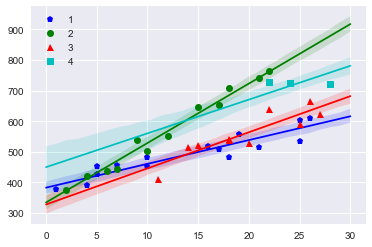

In [25]:
for i in range(1,5):
    d = df_10_5[df_10_5['KID']==i]
    plt.plot(d['X'], d['Y'], syms[i-1], label=str(i))
    plt.plot(data_10_5['X_new'], a[i-1]+b[i-1]*np.array(data_10_5['X_new']), clrs[i-1]+'-')
    ys = (fit_10_6.extract(permuted=True))['y_new'].T[i-1]
    plt.fill_between( \
        data_10_5['X_new'], \
        [np.percentile(y, 25) for y in ys], \
        [np.percentile(y, 75) for y in ys], facecolor=clrs[i-1], alpha=0.15)
plt.legend(loc='best')
plt.show()

$$\begin{align*}
Y_n &\sim \text{normal}(a_{k_n}+b_{k_n}X_n, \sigma_Y) \;\; n = 1, \dots, N\\
\left(\begin{array}{c} a_k \\ b_k \end{array}\right) &\sim \text{multi_normal_cholesky}\left(
\left(\begin{array}{c} a_0 \\ b_0 \end{array}\right), \text{cov}_{\text{corr}}\right) \;\; k = 1, \dots, K \\
\text{cov}_{\text{corr}} &\sim \left(\begin{array}{cc}\sigma_a & 0 \\ 0 & \sigma_b\end{array}\right)\text{lkj_corr_cholesky}(\nu)
\end{align*}$$

See Stan manual p.148

$\Sigma$ を作る代わりに $\Sigma = LL^T$(Cholesky分解)なる$L$を作るようなことをしてる。$\mu+Lz \sim \mathcal{N}(\mu, \Sigma)$ if $z \sim \mathcal{N}(0,1)$ なので、乱数生成に具合が良いのは確か。その部分が、`multi_normal_cholesky`.

In [26]:
model_10_7 = """
data {
  int N;
  int K;
  vector[N] X;
  vector[N] Y;
  int<lower=1, upper=K> KID[N];
  real Nu;
  int N_new;
  real X_new[N_new];
}

parameters {
  vector[2] ab[K];
  vector[2] ab0;
  cholesky_factor_corr[2] corr_chol;
  vector<lower=0>[2] sigma_vec;
  real<lower=0> s_Y;
}

transformed parameters {
  vector[K] a;
  vector[K] b;
  cholesky_factor_cov[2] cov_chol;
  for (k in 1:K) {
    a[k] = ab[k,1];
    b[k] = ab[k,2];
  }
  cov_chol = diag_pre_multiply(sigma_vec, corr_chol);
}

model {
  ab0[1] ~ normal(400, 200);
  ab0[2] ~ normal(15, 15);
  sigma_vec[1] ~ student_t(4, 0, 200);
  sigma_vec[2] ~ student_t(4, 0, 20);
  corr_chol ~ lkj_corr_cholesky(Nu);
  ab ~ multi_normal_cholesky(ab0, cov_chol);
  Y ~ normal(a[KID] + b[KID] .* X, s_Y);
}

generated quantities {
  matrix[2,2] corr;
  matrix[2,2] cov;
  real y_new[N_new,K];
  corr = multiply_lower_tri_self_transpose(corr_chol);
  cov = multiply_lower_tri_self_transpose(cov_chol);
  for (k in 1:K) {
    for (n in 1:N_new) {
      y_new[n,k] = normal_rng(a[k] + b[k]*X_new[n], s_Y);
    }
  }
}
"""

In [27]:
data_10_5['Nu']=2
fit_10_7 = pystan.stan(model_code=model_10_7, data=data_10_5, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9d1616d29de758405a5d77a4b28b374f NOW.


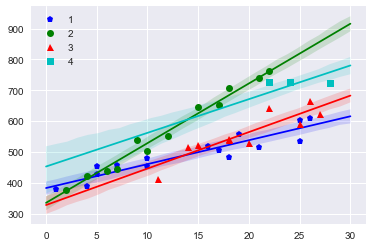

In [28]:
a = [np.average(x) for x in fit_10_7.extract(permuted=True)['a'].T]
b = [np.average(x) for x in fit_10_7.extract(permuted=True)['b'].T]
for i in range(1,5):
    d = df_10_5[df_10_5['KID']==i]
    plt.plot(d['X'], d['Y'], syms[i-1], label=str(i))
    plt.plot(data_10_5['X_new'], a[i-1]+b[i-1]*np.array(data_10_5['X_new']), clrs[i-1]+'-')
    ys = (fit_10_7.extract(permuted=True))['y_new'].T[i-1]
    plt.fill_between( \
        data_10_5['X_new'], \
        [np.percentile(y, 25) for y in ys], \
        [np.percentile(y, 75) for y in ys], facecolor=clrs[i-1], alpha=0.15)
plt.legend(loc='best')
plt.show()

## 10.3 再パラメータ化

In [29]:
model_10_8a = """
parameters {
  real a;
  vector[1000] r;
}

model {
  a ~ normal(0, 3);
  r ~ normal(0, exp(a/2));
}
"""

In [39]:
fit_10_8a = pystan.stan(model_code=model_10_8a, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8d29d970017e974abbe503f15a4ed2c7 NOW.


In [40]:
print(fit_10_8a)

Inference for Stan model: anon_model_8d29d970017e974abbe503f15a4ed2c7.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        2.15    1.59   2.24  -1.08    0.3   1.71   3.81   6.24      2    5.2
r[0]    -0.15     0.2   8.88 -20.44  -1.52  -0.05   1.47  20.53   2000    1.0
r[1]    -0.14     0.2   8.77 -21.73  -1.64  -0.02   1.47  19.29   2000    1.0
r[2]     0.03    0.17   7.79 -17.91  -1.54   0.02   1.54  18.23   2000    1.0
r[3]    -0.22     0.2   8.94 -21.62  -1.69  -0.04   1.47  18.44   2000    1.0
r[4]     0.12    0.17   7.76 -18.61  -1.55  -0.02   1.52  19.88   2000    1.0
r[5]    -0.23    0.19   8.62 -22.22  -1.56  -0.06   1.48  19.66   2000    1.0
r[6]     0.09    0.18   8.23  -20.1   -1.5    0.1   1.61  21.05   2000    1.0
r[7]     0.11    0.21   9.23 -21.91  -1.39   0.02   1.57  21.14   2000    1.0
r[8]     0.15    0.18   8.13  -17

In [41]:
a = [np.average(x) for x in fit_10_8a.extract(permuted=True)['a']]
r = [np.average(x) for x in fit_10_8a.extract(permuted=True)['r']]

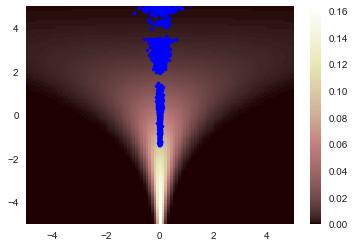

In [42]:
import scipy as sp
y = np.arange(-5, 5.1, 0.1)
x = np.arange(-5, 5.1, 0.1)

X, Y = np.meshgrid(x, y) 
Z = sp.stats.norm.pdf(X,0,np.exp(Y/2)) * sp.stats.norm.pdf(Y,0,3)

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.pink()
plt.plot(r,a,'b.')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

In [34]:
model_10_8b = """
parameters {
  real a_raw;
  vector[1000] r_raw;
}

transformed parameters {
  real a;
  vector[1000] r;
  a = 3.0 * a_raw;
  r = exp(a/2) * r_raw;
}

model {
  a_raw ~ normal(0, 1);
  r_raw ~ normal(0, 1);
}
"""

In [35]:
fit_10_8b = pystan.stan(model_code=model_10_8b, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a41187a24ff8cd32db0198f011f81f55 NOW.


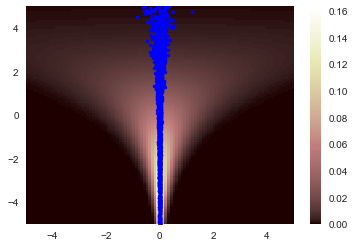

In [36]:
a = [np.average(x) for x in fit_10_8b.extract(permuted=True)['a']]
r = [np.average(x) for x in fit_10_8b.extract(permuted=True)['r']]
y = np.arange(-5, 5.1, 0.1)
x = np.arange(-5, 5.1, 0.1)

X, Y = np.meshgrid(x, y) 
Z = sp.stats.norm.pdf(X,0,np.exp(Y/2)) * sp.stats.norm.pdf(Y,0,3)

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.pink()
plt.plot(r,a,'b.')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()